In [1]:
import numpy as np
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from src.preprocess.functions import get_downstream_counts_object, get_upstream_counts_object

downstream_counts = get_downstream_counts_object()
upstream_counts = get_upstream_counts_object()

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/G-DRIVE/traces/data_stats_aggregated/downstream_counts.pickle'

In [3]:
len(downstream_counts)

20160

In [4]:
from src.preprocess.functions import get_attribute_probabilities, get_seasonality, get_all_call_counts

all_seasonality = get_seasonality()
downstream_probs = get_attribute_probabilities(all_seasonality)

In [5]:
from src.preprocess.functions import sample_downstream_microservices

#sampled_microservices = sample_downstream_microservices(downstream_probs, n=10)
sampled_microservices = ['MS_55085', 'MS_19585']

In [6]:
from src.preprocess.functions import get_microservice_workload

workloads_for_sampled_microservices = [
    get_microservice_workload(downstream_counts, sampled_microservice) 
    for sampled_microservice in sampled_microservices
]

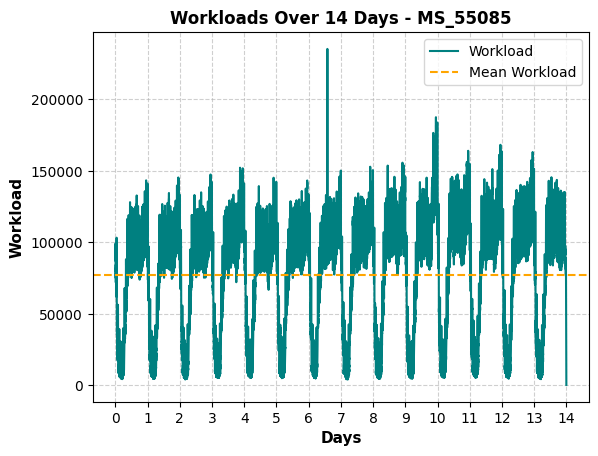

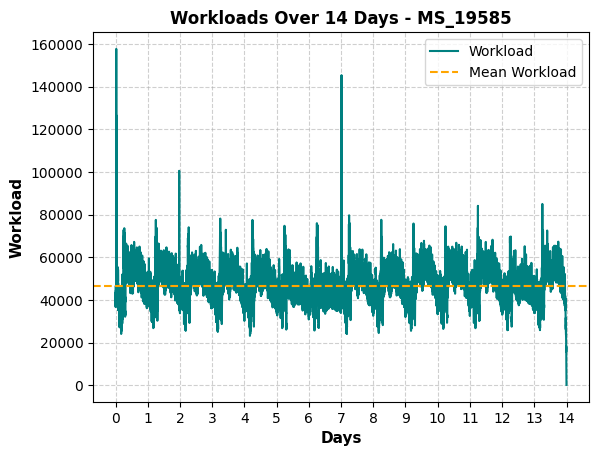

In [7]:
from src.plot import plot_microservice_workload

for i in range(len(workloads_for_sampled_microservices)):
    sampled_microservice = sampled_microservices[i]
    workloads_for_sampled_microservice = workloads_for_sampled_microservices[i]
    plot_microservice_workload(
        sampled_microservice, 
        workloads_for_sampled_microservice,
        f"../plots/workloads/workload_{i}.png"
    )

In [8]:
import os
import pickle

def get_k_neighbor_sets(node, k):
    i_node_set = set()
    u_node_set = set()
    
    def get_nested_k_neighbor_sets(graph, current_node, current_k, node_set):
        if current_k == 0:
            return
        
        node_set.add(current_node)
        
        neighbors = graph.get(current_node, {})
        for neighbor, _ in neighbors.items():
            get_nested_k_neighbor_sets(graph, neighbor, current_k - 1, node_set)
    
    with open(os.path.join(os.getenv('AGGREGATED_STATS_DIR'), 'downstream_graph.pickle'), 'rb') as file:
        downstream_graph = pickle.load(file)
    
    with open(os.path.join(os.getenv('AGGREGATED_STATS_DIR'), 'upstream_graph.pickle'), 'rb') as file:
        upstream_graph = pickle.load(file)
        
    get_nested_k_neighbor_sets(downstream_graph, node, k, i_node_set)
    get_nested_k_neighbor_sets(upstream_graph, node, k, u_node_set)
    return i_node_set, u_node_set

In [18]:
from src.preprocess.functions import get_node_label_encoder

label_encoder = get_node_label_encoder()
labels = label_encoder.transform(['MS_32402', 'MS_19585'])

In [19]:
labels

[22887, 9944]

In [20]:
i_set_1, u_set_1 = get_k_neighbor_sets(23998, 3)

In [21]:
len(i_set_1), len(u_set_1), len(i_set_1 | u_set_1)

(25, 7763, 7763)

In [22]:
i_set_2, u_set_2 = get_k_neighbor_sets(66470, 3)

In [23]:
len(i_set_2), len(u_set_2), len(i_set_2 | u_set_2)

(53, 68, 101)

In [24]:
total_set = i_set_1 | u_set_1 | i_set_2 | u_set_2

In [26]:
len(total_set)

7784

In [27]:
import pandas as pd

combined_set = set()

for i in range(20160):
    df = pd.read_parquet(f'/Volumes/G-DRIVE/traces/filtered_data_files/data_{i}.parquet')
    u_set = set(df['u'])
    i_set = set(df['i'])
    combined_set = combined_set | u_set | i_set
    
combined_list = list(combined_set)
len(combined_list)

KeyboardInterrupt: 

In [29]:
from src.preprocess.functions import get_total_interactions

get_total_interactions('/Volumes/G-DRIVE/traces/data_stats_aggregated/filtered_counts.pickle')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/G-DRIVE/traces/data_stats_aggregated/filtered_counts.pickle'

In [ ]:
from src.preprocess.functions import get_filtered_node_label_encoder

label_encoder = get_filtered_node_label_encoder()

In [ ]:
label_encoder.classes_

In [ ]:
label_encoder.transform(['MS_3351'])

In [ ]:
label_encoder.inverse_transform([4])

In [1]:
import pandas as pd

df = pd.read_parquet('/Users/ashfaq/Documents/traces/filtered_data_files/data_2500.parquet')

In [3]:
selected_df = df[['u', 'i', 'ts']]

In [6]:
selected_df.to_csv('../data/data.csv', index=False)